# EDA

## Data Reading

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
directory_name = "CLEANED_DATA"

if not os.path.exists(directory_name):
    os.makedirs(directory_name)

In [3]:
path = 'CLEANED_DATA'

csv_files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.csv')]

dfs = [pd.read_csv(f) for f in csv_files]

# Merging the dataframes on the 'DATE' column
df_final = pd.concat(dfs, ignore_index=False).groupby('DATE').sum()

In [4]:
df_final.head()

,all_Const_Emp,emratio,GDP,home_ow_rate,house_st,income,IPI_Cement,labor_percent,monthly_supply,mortgage_rate,...,new_private_house,new_private_hw_under,permit,population,PPI_Cement,PPI_Concrete,p_saving_rate,target,total_emp_cons,unemployed_rate
DATE,,,,,,,,,,,,,,,,,,,,,
1987-01-01,722.3,61.0,4722.156,63.9,1774.0,3820.2,123.7373,65.4,6.0,9.2040,...,1862.0,1090.0,1690.0,241857.0,100.1,109.3,9.4,63.735,5007.0,6.6
1987-02-01,724.2,61.1,4722.156,63.9,1784.0,3845.0,123.1670,65.5,6.2,9.0825,...,1771.0,1096.0,1689.0,242005.0,100.8,109.3,8.2,64.135,5038.0,6.6
1987-03-01,727.9,61.2,4722.156,63.9,1726.0,3863.8,122.5706,65.5,6.0,9.0350,...,1694.0,1084.0,1704.0,242166.0,101.2,109.3,8.1,64.470,5039.0,6.6
1987-04-01,728.1,61.3,4806.160,63.9,1614.0,3875.4,123.5345,65.4,6.0,9.8325,...,1735.0,1079.0,1601.0,242338.0,100.8,109.3,4.1,64.973,5053.0,6.3
1987-05-01,727.6,61.6,4806.160,63.9,1628.0,3908.6,123.8454,65.7,6.7,10.5960,...,1713.0,1070.0,1500.0,242516.0,101.2,108.7,7.8,65.547,5080.0,6.3


In [5]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 439 entries, 1987-01-01 to 2023-07-01
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   all_Const_Emp         439 non-null    float64
 1   emratio               439 non-null    float64
 2   GDP                   439 non-null    float64
 3   home_ow_rate          439 non-null    float64
 4   house_st              439 non-null    float64
 5   income                439 non-null    float64
 6   IPI_Cement            439 non-null    float64
 7   labor_percent         439 non-null    float64
 8   monthly_supply        439 non-null    float64
 9   mortgage_rate         439 non-null    float64
 10  MSPUS                 439 non-null    float64
 11  new_private_house     439 non-null    float64
 12  new_private_hw_under  439 non-null    float64
 13  permit                439 non-null    float64
 14  population            439 non-null    float64
 15  PPI_Cement  

In [6]:
df_final.describe()

,all_Const_Emp,emratio,GDP,home_ow_rate,house_st,income,IPI_Cement,labor_percent,monthly_supply,mortgage_rate,...,new_private_house,new_private_hw_under,permit,population,PPI_Cement,PPI_Concrete,p_saving_rate,target,total_emp_cons,unemployed_rate
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,...,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,742.157631,61.353531,13236.389663,65.777221,1337.020501,11171.951708,119.565531,65.113440,5.899772,6.315856,...,1301.466970,954.018223,1355.164009,293349.423690,176.834228,179.159756,6.331435,141.151487,6288.307517,5.776993
std,123.747671,2.067575,5902.255151,1.744104,379.076753,5197.803116,23.911004,1.786754,1.740840,2.172124,...,353.450626,289.464053,390.759196,28737.180981,57.243653,51.907865,2.888201,60.304741,959.538073,1.676957
min,542.600000,51.300000,4722.156000,63.100000,478.000000,3820.200000,66.350800,60.100000,3.300000,2.684000,...,520.000000,414.000000,513.000000,241857.000000,100.100000,108.700000,1.400000,63.735000,4570.000000,3.400000
25%,633.150000,59.750000,7868.468000,64.100000,1103.000000,6539.100000,101.180200,63.100000,4.500000,4.316250,...,1088.500000,760.000000,1089.500000,268602.000000,129.200000,141.400000,4.900000,81.733000,5424.500000,4.600000
50%,734.300000,61.900000,12922.656000,65.500000,1377.000000,10464.100000,116.904800,66.000000,5.600000,6.262000,...,1333.000000,973.000000,1381.000000,295359.000000,171.800000,163.200000,6.100000,141.048000,6402.000000,5.400000
75%,826.250000,62.900000,17518.508000,67.400000,1582.500000,14724.800000,139.426100,66.500000,6.800000,7.838000,...,1546.000000,1123.000000,1624.000000,319331.500000,210.050000,207.000000,7.450000,178.937000,7092.000000,6.600000
max,1022.000000,64.700000,27623.543000,69.400000,2273.000000,24471.800000,192.032200,67.300000,12.200000,11.260000,...,2245.000000,1710.000000,2263.000000,335329.000000,331.181000,336.455000,32.000000,310.162000,7967.000000,14.700000


## Plotting density plot for all the numerical features

<Figure size 200x900 with 0 Axes>

<Figure size 200x200 with 0 Axes>

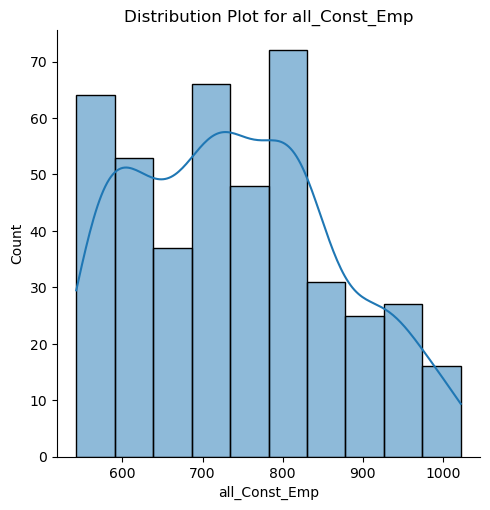

<Figure size 200x200 with 0 Axes>

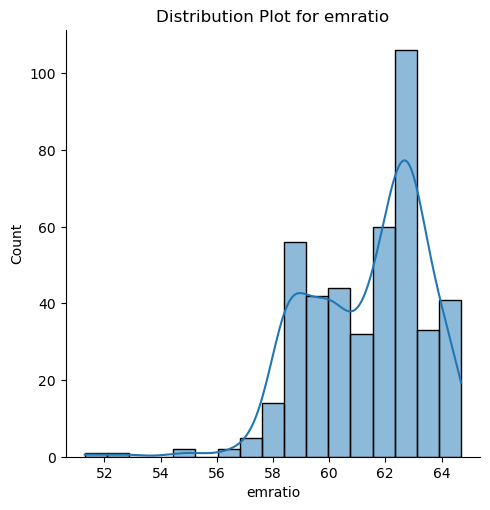

<Figure size 200x200 with 0 Axes>

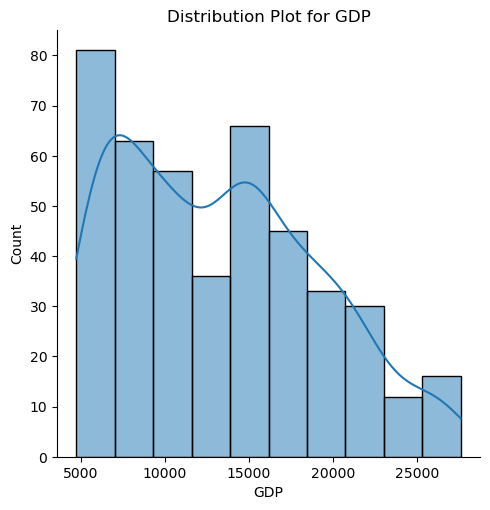

<Figure size 200x200 with 0 Axes>

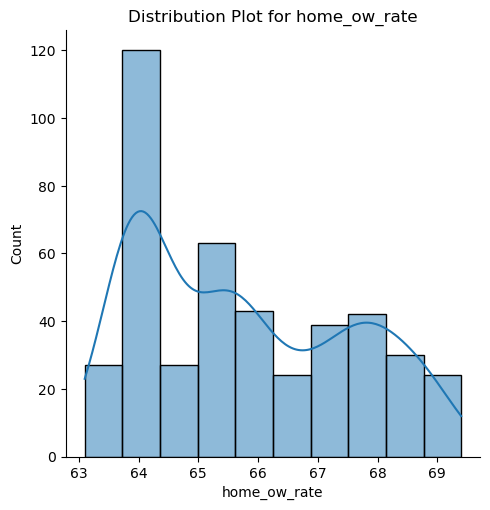

<Figure size 200x200 with 0 Axes>

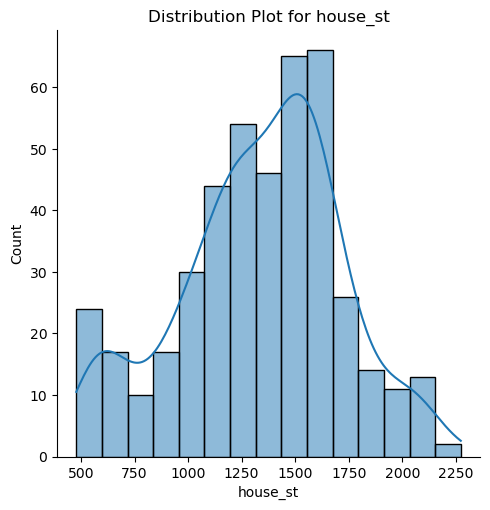

<Figure size 200x200 with 0 Axes>

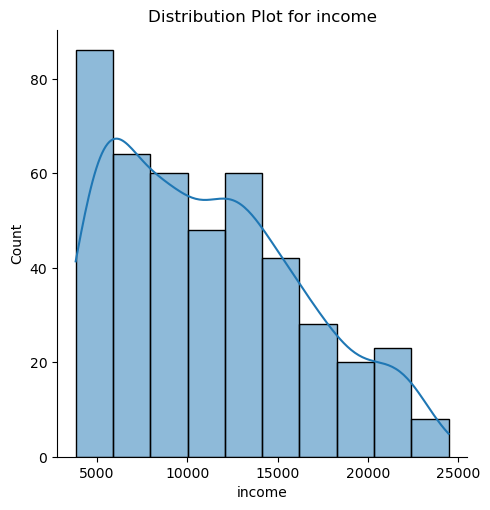

<Figure size 200x200 with 0 Axes>

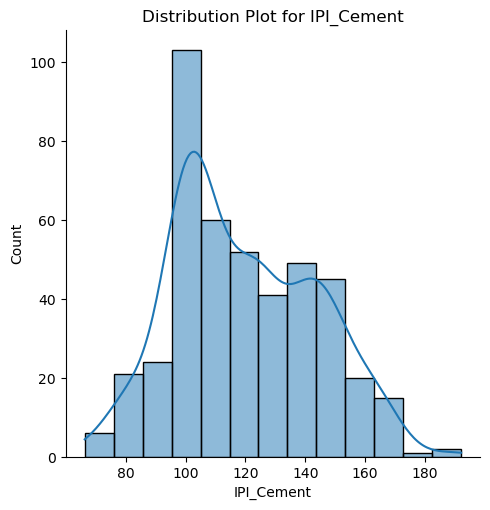

<Figure size 200x200 with 0 Axes>

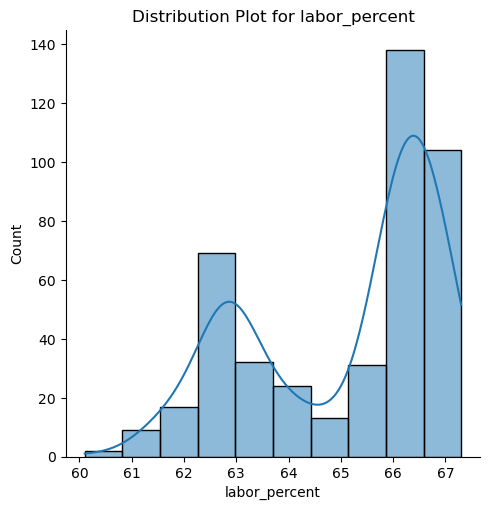

<Figure size 200x200 with 0 Axes>

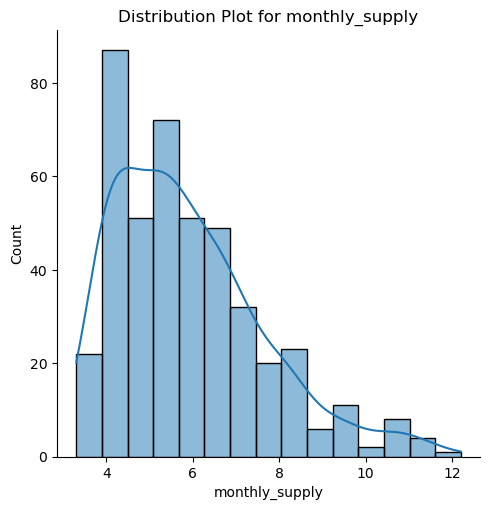

<Figure size 200x200 with 0 Axes>

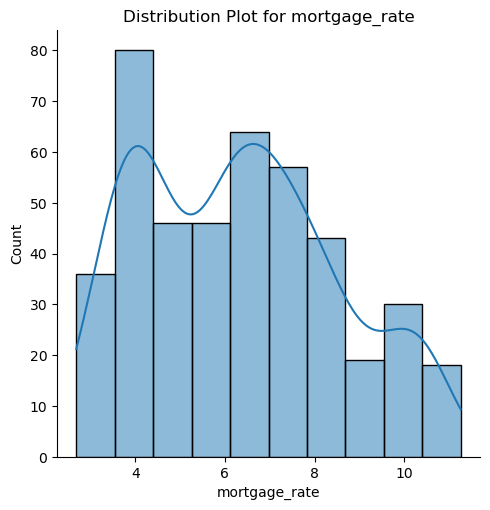

<Figure size 200x200 with 0 Axes>

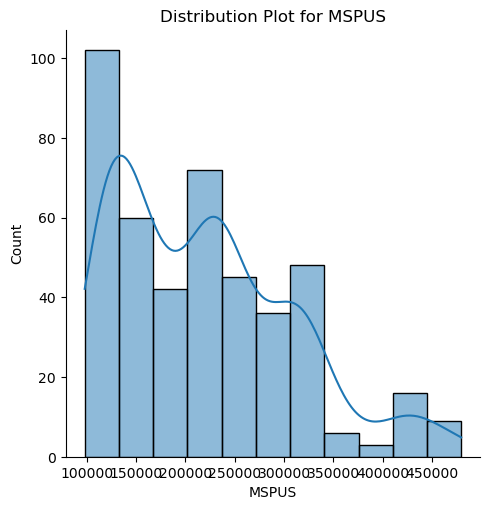

<Figure size 200x200 with 0 Axes>

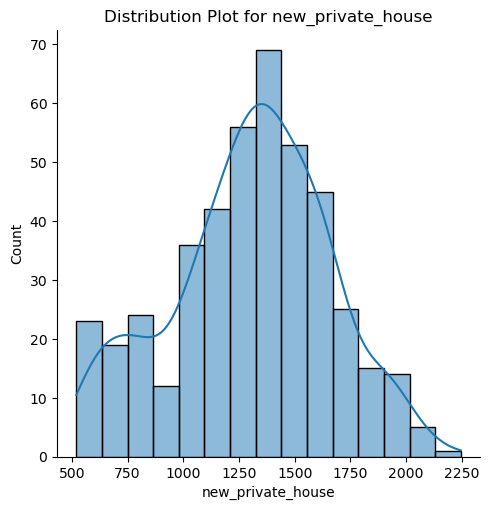

<Figure size 200x200 with 0 Axes>

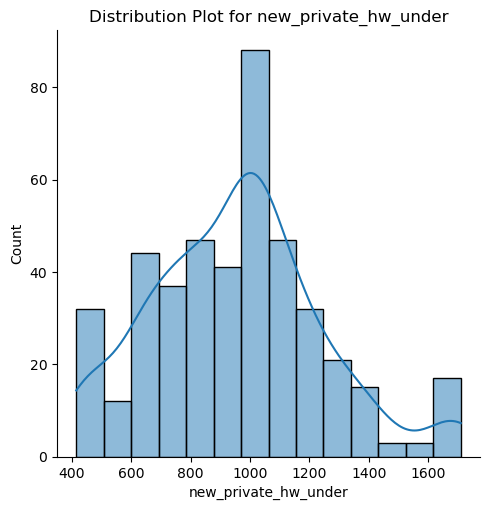

<Figure size 200x200 with 0 Axes>

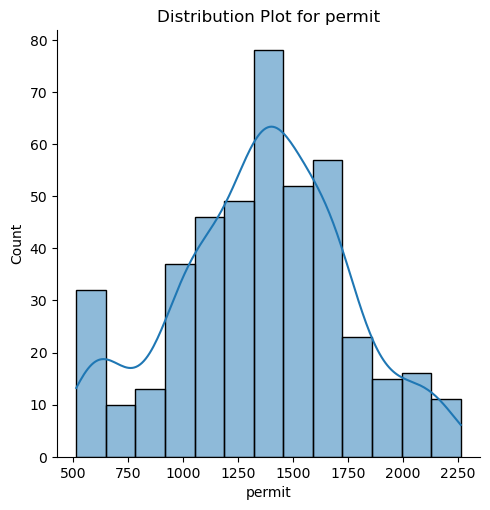

<Figure size 200x200 with 0 Axes>

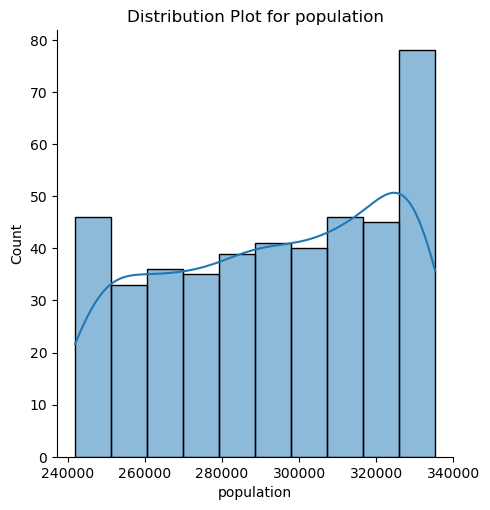

<Figure size 200x200 with 0 Axes>

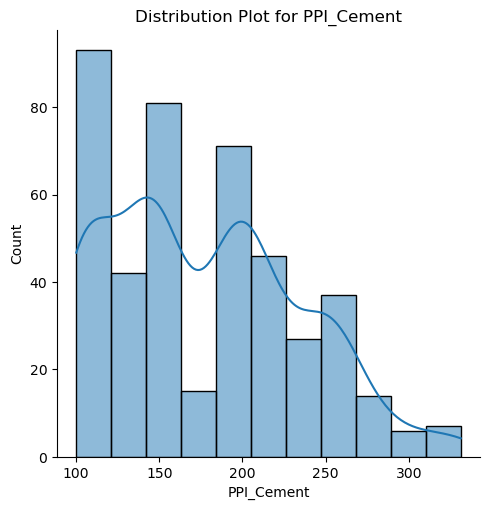

<Figure size 200x200 with 0 Axes>

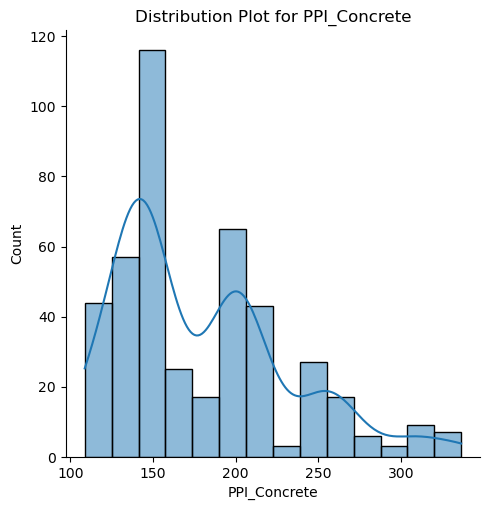

<Figure size 200x200 with 0 Axes>

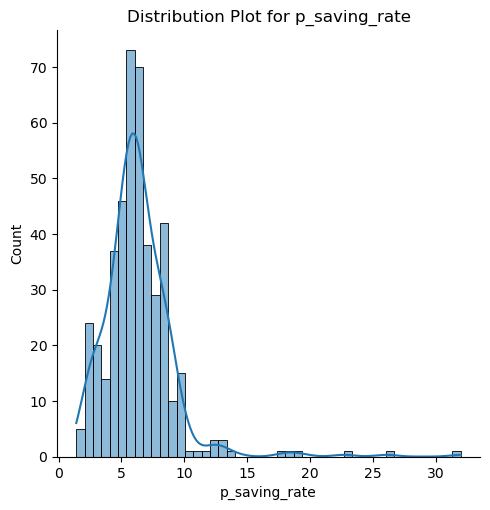

<Figure size 200x200 with 0 Axes>

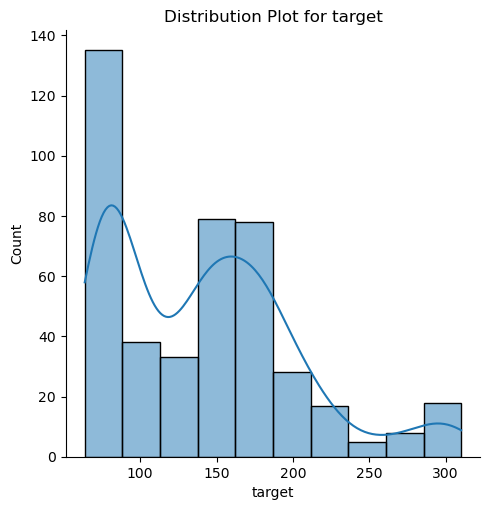

<Figure size 200x200 with 0 Axes>

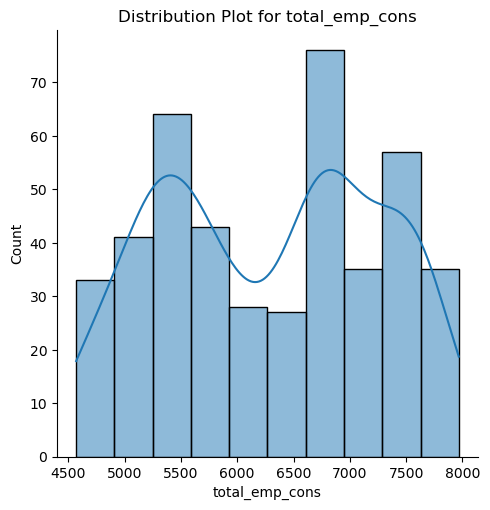

<Figure size 200x200 with 0 Axes>

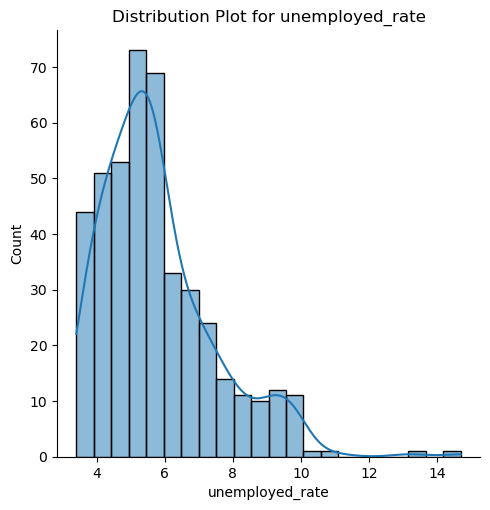

In [7]:
plt.figure(figsize=(2, 9))
for col in df_final.columns.tolist():
    plt.figure(figsize=(2,2))
    sns.displot(data=df_final, x=col, kde =True)
    plt.xlabel(f"{col}")
    plt.ylabel("Count")
    plt.title(f'Distribution Plot for {col}')
    plt.show()

## Plotting boxplot for analyzing the outliers in the data

<Figure size 200x900 with 0 Axes>

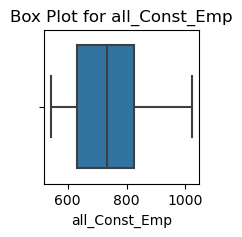

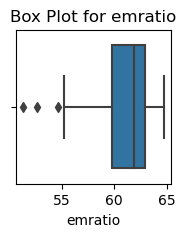

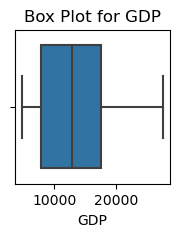

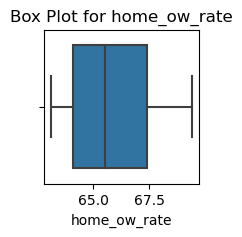

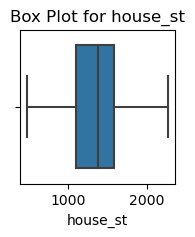

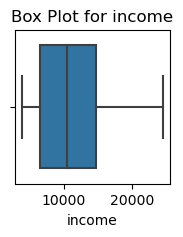

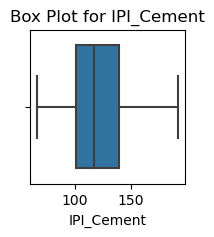

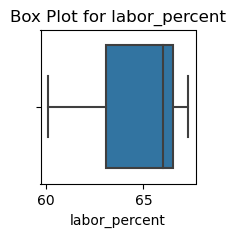

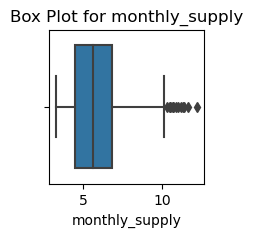

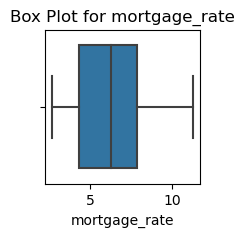

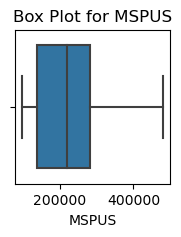

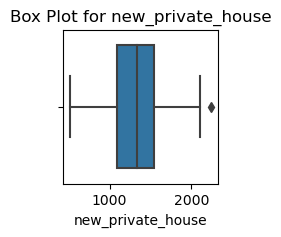

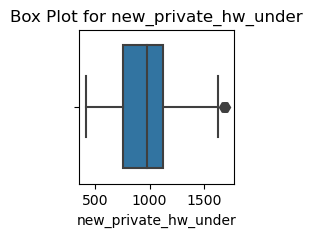

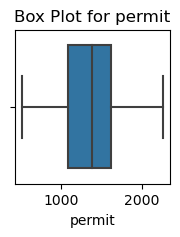

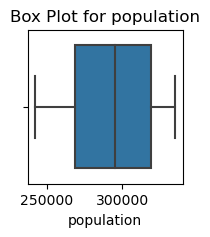

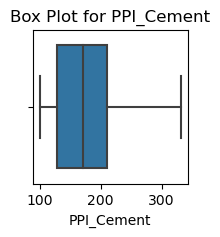

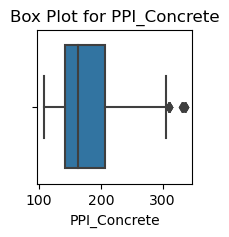

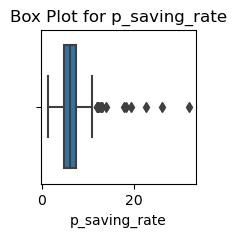

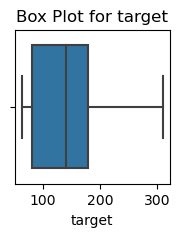

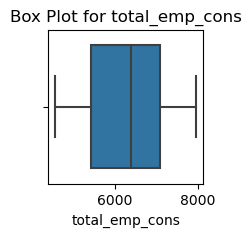

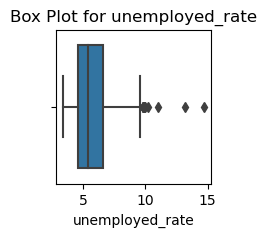

In [8]:
plt.figure(figsize=(2,9))
for col in df_final.columns.tolist():
    plt.figure(figsize=(2,2))
    sns.boxplot(data=df_final, x=col)
    plt.xlabel(f"{col}")
    plt.title(f'Box Plot for {col}')
    plt.show()

**We have outliers in few features:**

- p_saving_rate
- PPI_Concrete
- new_private_house
- emratio
- new_private_hw_under
- monthly_supply
- unemployed_rate

## Treating Skewness and Outliers: 

### p_saving_rate

In [9]:
df_final['p_saving_rate'].skew()

3.3130896915520984

In [10]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["p_saving_rate"].quantile(0.25)
q2 = df_final["p_saving_rate"].quantile(0.75)

IQR =q2-q1

In [11]:
lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

1.0750000000000006
11.275


(None, None)

In [12]:
# capping the features to upper boundry only.
df_final.loc[df_final['p_saving_rate'] >=upper_bridge,'p_saving_rate'] = upper_bridge

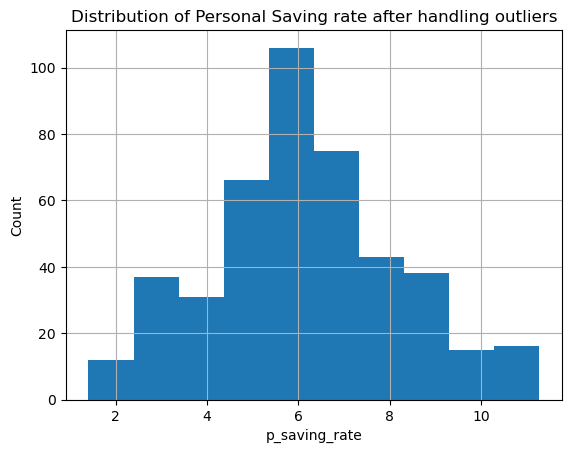

In [13]:
df_final['p_saving_rate'].hist()
plt.title("Distribution of Personal Saving rate after handling outliers")
plt.xlabel("p_saving_rate")
plt.ylabel("Count")
plt.show()

### PPI_Concrete 

In [14]:
df_final['PPI_Concrete'].skew()

0.9333165648577373

In [15]:
df_final['PPI_Concrete'] = np.log1p(df_final['PPI_Concrete'])

<AxesSubplot:>

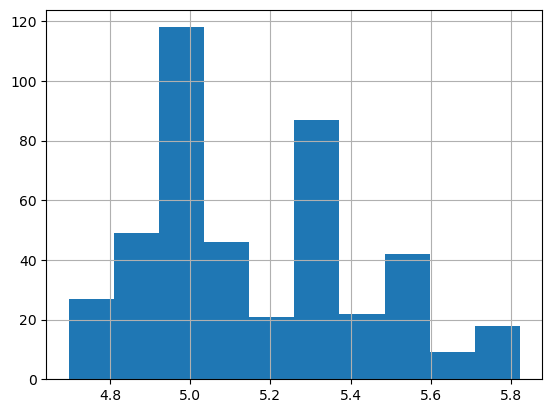

In [16]:
df_final['PPI_Concrete'].hist()

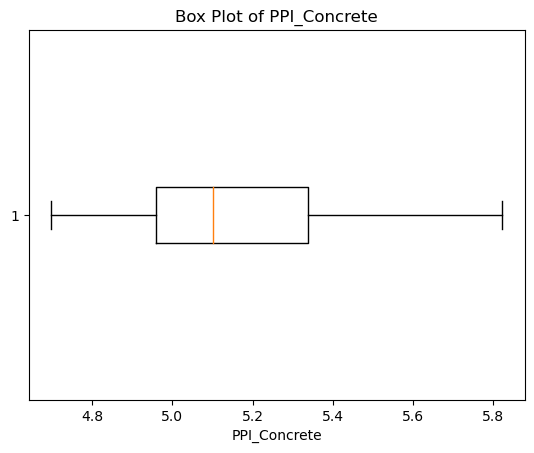

In [17]:
plt.boxplot(df_final['PPI_Concrete'], vert=False)
plt.xlabel('PPI_Concrete')
plt.title('Box Plot of PPI_Concrete')
plt.show()

### New private house 

In [18]:
df_final['new_private_house'].skew()

-0.21940615301839025

In [19]:
from scipy import stats

transformed_data, lambda_value = stats.yeojohnson(df_final['new_private_house'])
df_final['new_private_house'] = transformed_data

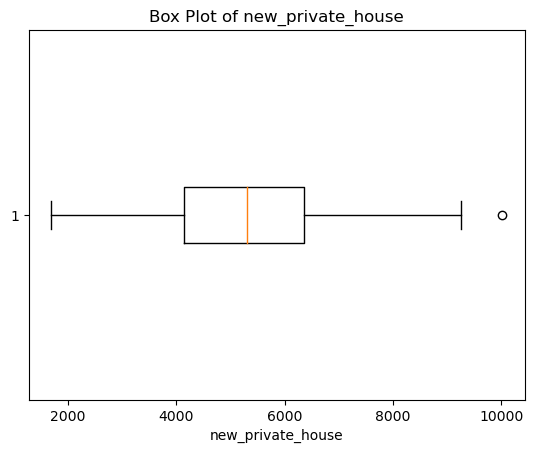

In [20]:
plt.boxplot(df_final['new_private_house'], vert=False)
plt.xlabel('new_private_house')
plt.title('Box Plot of new_private_house')
plt.show()

In [21]:
max_value = df_final['new_private_house'].max()

df_final['new_private_house'] = np.where(df_final['new_private_house'] > max_value, max_value, df_final['new_private_house'])


### emratio 

In [22]:
df_final['emratio'].skew()

-0.7538612695782946

In [23]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["emratio"].quantile(0.25)
q2 = df_final["emratio"].quantile(0.75)

IQR =q2-q1

In [24]:
lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

55.025000000000006
67.625


(None, None)

In [25]:
df_final.loc[df_final['emratio'] <=lower_bridge,'emratio'] = lower_bridge

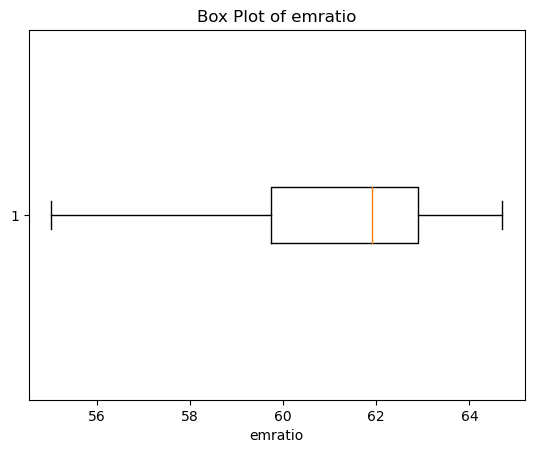

In [26]:
plt.boxplot(df_final['emratio'], vert=False)
plt.xlabel('emratio')
plt.title('Box Plot of emratio')
plt.show()

### new_private_hw_under¶

In [27]:
df_final['new_private_hw_under'].skew()

0.36887282115041053

In [28]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["new_private_hw_under"].quantile(0.25)
q2 = df_final["new_private_hw_under"].quantile(0.75)

IQR =q2-q1

In [29]:
lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

215.5
1667.5


(None, None)

In [30]:
df_final.loc[df_final['new_private_hw_under'] >=upper_bridge,'new_private_hw_under'] = upper_bridge

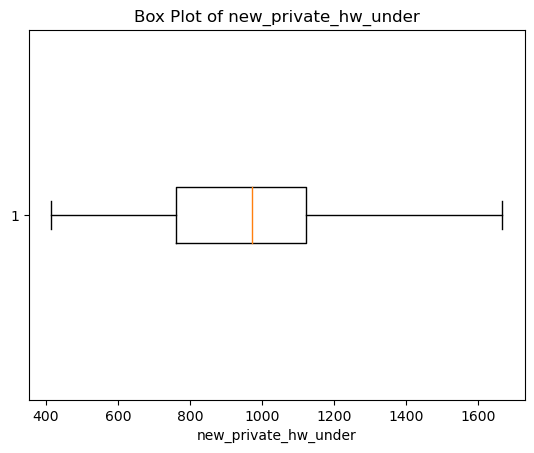

In [31]:
plt.boxplot(df_final['new_private_hw_under'], vert=False)
plt.xlabel('new_private_hw_under')
plt.title('Box Plot of new_private_hw_under')
plt.show()

### Monthly supply

In [32]:
df_final['monthly_supply'].skew()

1.0003922160771488

In [33]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["monthly_supply"].quantile(0.25)
q2 = df_final["monthly_supply"].quantile(0.75)

IQR =q2-q1

In [34]:
lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

1.0500000000000003
10.25


(None, None)

In [35]:
df_final.loc[df_final['monthly_supply'] >=upper_bridge,'monthly_supply'] = upper_bridge

<AxesSubplot:>

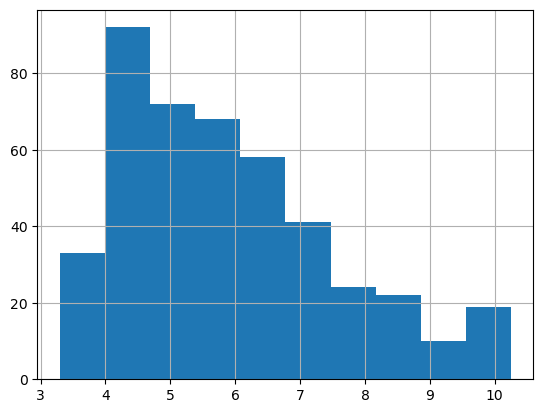

In [36]:
df_final['monthly_supply'].hist()

## Unemployed rate

In [37]:
df_final['unemployed_rate'].skew()

1.2751925262720107

In [38]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["unemployed_rate"].quantile(0.25)
q2 = df_final["unemployed_rate"].quantile(0.75)

IQR =q2-q1

In [39]:
lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

1.5999999999999996
9.6


(None, None)

In [40]:
df_final.loc[df_final['unemployed_rate'] >=upper_bridge,'unemployed_rate'] = upper_bridge

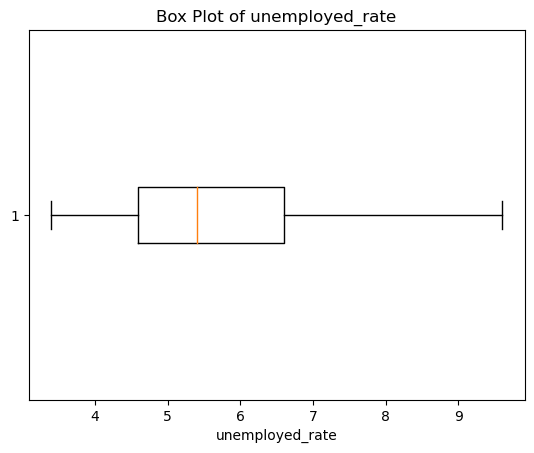

In [41]:
plt.boxplot(df_final['unemployed_rate'], vert=False)
plt.xlabel('unemployed_rate')
plt.title('Box Plot of unemployed_rate')
plt.show()

# Model Training

In [42]:
df = pd.read_csv("df_final.csv")

In [43]:
df.head()

,DATE,all_Const_Emp,emratio,GDP,home_ow_rate,house_st,income,IPI_Cement,labor_percent,monthly_supply,...,new_private_house,new_private_hw_under,permit,population,PPI_Cement,PPI_Concrete,p_saving_rate,target,total_emp_cons,unemployed_rate
0,1987-01-01,722.3,61.0,4722.156,63.9,1774.0,3820.2,123.7373,65.4,6.0,...,7974.739004,1090.0,1690.0,241857.0,100.1,4.703204,9.4,63.735,5007.0,6.6
1,1987-02-01,724.2,61.1,4722.156,63.9,1784.0,3845.0,123.1670,65.5,6.2,...,7502.244305,1096.0,1689.0,242005.0,100.8,4.703204,8.2,64.135,5038.0,6.6
2,1987-03-01,727.9,61.2,4722.156,63.9,1726.0,3863.8,122.5706,65.5,6.0,...,7106.570176,1084.0,1704.0,242166.0,101.2,4.703204,8.1,64.470,5039.0,6.6
3,1987-04-01,728.1,61.3,4806.160,63.9,1614.0,3875.4,123.5345,65.4,6.0,...,7316.773819,1079.0,1601.0,242338.0,100.8,4.703204,4.1,64.973,5053.0,6.3
4,1987-05-01,727.6,61.6,4806.160,63.9,1628.0,3908.6,123.8454,65.7,6.7,...,7203.844501,1070.0,1500.0,242516.0,101.2,4.697749,7.8,65.547,5080.0,6.3


## Seperating dependent and independent variables

In [44]:
x = df.drop(columns=['DATE', 'target'], axis=1)
y = df.target

In [45]:
x.shape

(439, 20)

In [46]:
y.shape

(439,)

## Data Standardization using Standard Scaler

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,all_Const_Emp,emratio,GDP,home_ow_rate,house_st,income,IPI_Cement,labor_percent,monthly_supply,mortgage_rate,MSPUS,new_private_house,new_private_hw_under,permit,population,PPI_Cement,PPI_Concrete,p_saving_rate,total_emp_cons,unemployed_rate
0,-0.160652,-0.183182,-1.444185,-1.077552,1.154062,-1.416010,0.174670,0.160563,0.073505,1.331157,-1.356928,1.644170,0.476520,0.857863,-1.793884,-1.342014,-1.66500,1.568189,-1.336861,0.541436
1,-0.145280,-0.133411,-1.444185,-1.077552,1.180472,-1.411233,0.150792,0.216595,0.193018,1.275157,-1.356928,1.363525,0.497420,0.855301,-1.788728,-1.329771,-1.66500,0.989409,-1.304517,0.541436
2,-0.115347,-0.083641,-1.444185,-1.077552,1.027294,-1.407612,0.125821,0.216595,0.073505,1.253264,-1.356928,1.128509,0.455620,0.893732,-1.783119,-1.322776,-1.66500,0.941177,-1.303474,0.541436
3,-0.113729,-0.033870,-1.429936,-1.077552,0.731502,-1.405378,0.166179,0.160563,0.073505,1.620835,-1.295778,1.253362,0.438203,0.629842,-1.777127,-1.329771,-1.66500,-0.988090,-1.288867,0.350979
4,-0.117774,0.115442,-1.429936,-1.077552,0.768476,-1.398983,0.179196,0.328657,0.491800,1.972736,-1.295778,1.186286,0.406852,0.371076,-1.770926,-1.322776,-1.68507,0.796482,-1.260696,0.350979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,1.532623,-0.481806,2.302967,0.127878,0.113509,2.231552,-1.098082,-1.408312,1.328391,0.105152,2.324311,0.629897,2.488185,0.209667,1.442411,2.623433,2.41207,-0.457542,1.671137,-1.426620
435,1.504307,-0.481806,2.345273,0.070477,0.028997,2.242704,-1.142460,-1.408312,1.029609,0.012280,2.207569,0.300066,2.488185,0.158426,1.446835,2.627963,2.44964,-0.457542,1.682614,-1.490105
436,1.501880,-0.531576,2.345273,0.070477,0.649631,2.257592,-0.918287,-1.408312,0.790583,0.050305,2.207569,0.647721,2.488185,0.360828,1.451468,2.661700,2.44964,-0.409310,1.708698,-1.299648
437,1.515633,-0.531576,2.345273,0.070477,0.213867,2.266915,-0.943065,-1.408312,0.969852,0.183506,2.207569,0.523282,2.488185,0.219915,1.456694,2.656173,2.44964,-0.602237,1.738956,-1.363134


## Checking VIF values to solve multicollinearity

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,85.055290,all_Const_Emp
1,912.430831,emratio
2,618.759023,GDP
3,21.992331,home_ow_rate
4,39.484317,house_st
5,388.438641,income
6,13.110434,IPI_Cement
7,625.340953,labor_percent
8,5.903687,monthly_supply
9,25.612330,mortgage_rate


In [49]:
x.drop('emratio', axis=1, inplace=True)

In [50]:
# Now, let's check the VIF again, after removing the column 'emratio'

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,85.050839,all_Const_Emp
1,593.014806,GDP
2,20.807648,home_ow_rate
3,39.094089,house_st
4,370.222960,income
5,12.852259,IPI_Cement
6,48.561985,labor_percent
7,5.872943,monthly_supply
8,25.608565,mortgage_rate
9,131.861556,MSPUS


## Finding best random state

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [52]:
from sklearn.linear_model import LinearRegression

maxAcc = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    model = LinearRegression()
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Maximum r2 score is ",maxAcc*100,"at random state ",maxRS)


Maximum r2 score is  99.66669755994344 at random state  60


## Train Test Split 

In [53]:
# Now, let's split the data into training and testing data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=50)

## Linear Regression

In [54]:
from sklearn import metrics

LR = LinearRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)

print("R2_score:", r2_score(y_test,predLR)*100)
print("MAE:", metrics.mean_absolute_error(y_test,predLR))
print("MSE:", metrics.mean_squared_error(y_test,predLR))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,predLR)))

R2_score: 99.54374689176278
MAE: 3.004873921104363
MSE: 15.458555567769295
RMSE: 3.9317369657403707


### Ridge Regressor

In [55]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

paramsRidge = {'alpha':[0.01, 0.1, 1.0, 10.26], 'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
ridge = Ridge()
clf = GridSearchCV(ridge, paramsRidge)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'alpha': 0.1, 'solver': 'svd'}


In [56]:
ridge = Ridge(alpha=10.26, solver='saga')
ridge.fit(x_train, y_train)
ridge.score(x_train, y_train)
pred_ridge = ridge.predict(x_test)

print("R2_score:", r2_score(y_test, pred_ridge)*100)
print("MAE:", metrics.mean_absolute_error(y_test, pred_ridge))
print("MSE:", metrics.mean_squared_error(y_test, pred_ridge))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))

R2_score: 99.06636492825268
MAE: 4.222330979396517
MSE: 31.63298918090888
RMSE: 5.624321219570311


### Lasso Regressor 

In [57]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

paramsLasso = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10], 'random_state':list(range(0,100))}
lasso = Lasso()
clf = GridSearchCV(lasso, paramsLasso)
clf.fit(x_train, y_train)
print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [58]:
lasso = Lasso(alpha=1, random_state=0)
lasso.fit(x_train, y_train)
lasso.score(x_train, y_train)
pred_lasso = lasso.predict(x_test)

print("R2_score:", r2_score(y_test, pred_lasso)*100)
print("MAE:", metrics.mean_absolute_error(y_test, pred_lasso))
print("MSE:", metrics.mean_squared_error(y_test, pred_lasso))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))

R2_score: 99.16252201455444
MAE: 4.3397836707904895
MSE: 28.37503951438819
RMSE: 5.326822647168591


## KNeighbors Regressor

In [59]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(x_train, y_train)
knr.score(x_train, y_train)
pred_knr = knr.predict(x_test)

print("R2_score:", r2_score(y_test, pred_knr)*100)
print("MAE:", metrics.mean_absolute_error(y_test, pred_knr))
print("MSE:", metrics.mean_squared_error(y_test, pred_knr))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, pred_knr)))

R2_score: 99.81288037457152
MAE: 1.6096984848484872
MSE: 6.3399001021212165
RMSE: 2.5179158250666793


## Random Forest Regressor

In [60]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
pred_rfr = rfr.predict(x_test)

print('R2_Score:',r2_score(y_test, pred_rfr)*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred_rfr))
print('MSE:', metrics.mean_squared_error(y_test, pred_rfr))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, pred_rfr)))

R2_Score: 99.86952079201306
MAE: 1.068598712121206
MSE: 4.420835827064346
RMSE: 2.10257837596232


## Gradient Boosting Regressor

In [61]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr = gbr.predict(x_test)

print('R2_Score:',metrics.r2_score(y_test,pred_gbr)*100)
print('MAE:',metrics.mean_absolute_error(y_test, pred_gbr))
print('MSE:',metrics.mean_squared_error(y_test, pred_gbr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_gbr)))

R2_Score: 99.91242222662108
MAE: 1.0637189683483093
MSE: 2.967269377101234
RMSE: 1.7225763777264664


## Checking for Cross Validation Score

In [62]:
from sklearn.model_selection import cross_val_score


print("CV score for LinearRegression:", cross_val_score(LR,x,y,cv=5).mean())
print("CV score for Ridge Regression:", cross_val_score(ridge,x,y,cv=5).mean())
print("CV score for Lasso Regression:",cross_val_score(lasso,x,y,cv=5).mean())
print("CV score for KNeighbors Regression:",cross_val_score(knr,x,y,cv=5).mean())
print("CV score for Random Froest Regression:",cross_val_score(rfr,x,y,cv=5).mean())
print("CV score for Gradient Boosting Regression:",cross_val_score(gbr,x,y,cv=5).mean())

CV score for LinearRegression: -0.4692833707007287
CV score for Ridge Regression: -1.5695721736873043
CV score for Lasso Regression: -0.22652587018891182
CV score for KNeighbors Regression: -2.181480878736366
CV score for Random Froest Regression: -1.5748316919378627
CV score for Gradient Boosting Regression: -1.4797568645167931


## Hyperparameter Tuning

In [63]:
# Now, let's perform the Hyperparameter Tuning for Lasso Regressor

from sklearn.model_selection import GridSearchCV

parameters = {'alpha':[0.01,0.1,1.0,10.26],
              'selection':['cyclic','random'],
              'max_iter':[2,4,6,8,10],
              'tol':[100,1000],
              'fit_intercept':['bool']}

GCV = GridSearchCV(Lasso(),parameters,cv=5)

GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.26],
                         'fit_intercept': ['bool'],
                         'max_iter': [2, 4, 6, 8, 10],
                         'selection': ['cyclic', 'random'],
                         'tol': [100, 1000]})

In [64]:
GCV.best_params_

{'alpha': 0.1,
 'fit_intercept': 'bool',
 'max_iter': 8,
 'selection': 'random',
 'tol': 1000}

In [65]:
# Creating the Final Model

HouseLLC = Lasso(alpha=1.0, fit_intercept='bool', max_iter=8, selection='random', tol=1000)
HouseLLC.fit(x_train,y_train)
pred = HouseLLC.predict(x_test)
print('R2_score:',r2_score(y_test, pred_lasso)*100)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))

R2_score: 99.16252201455444
RMSE value: 5.326822647168591


## Saving the Model

In [66]:
import joblib
joblib.dump(HouseLLC, 'USA Home Price')

['USA Home Price']

In [67]:
loadmodel = joblib.load('USA Home Price')

## Prediction

In [68]:
import numpy as np

a = np.array(y_test)
predicted = np.array(loadmodel.predict(x_test))

df_final = pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_final

,Original,Predicted
0,80.078,86.783088
1,141.946,137.322212
2,75.696,72.241786
3,174.098,177.559589
4,287.258,297.001676
...,...,...
127,67.624,68.267545
128,75.655,64.543312
129,125.494,129.402003
130,76.327,71.317891


## Prediction with Visualization 

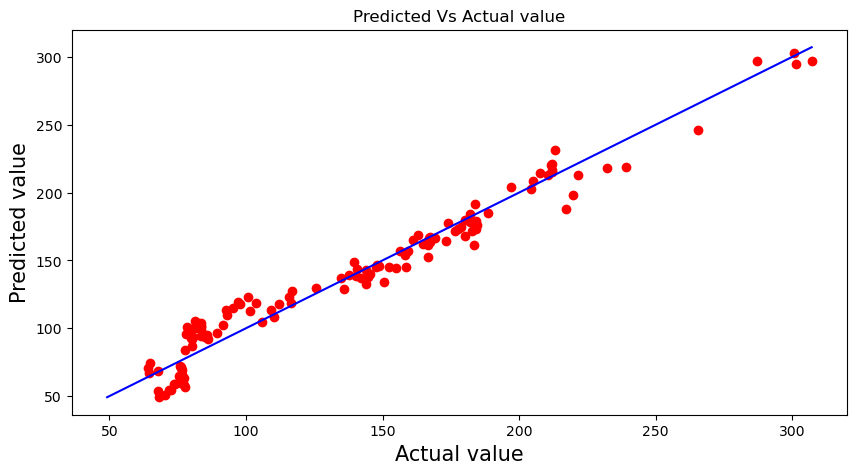

In [69]:
# Now, let's plot the graph of Actual value vs Predicted

plt.figure(figsize=(10,5))
plt.scatter(y_test, predicted, c='r')
plt1 = max(max(predicted), max(y_test))
plt2 = min(min(predicted), min(y_test))
plt.plot([plt1,plt2], [plt1,plt2], 'b-')
plt.xlabel('Actual value', fontsize=15)
plt.ylabel('Predicted value', fontsize=15)
plt.title("Predicted Vs Actual value")
plt.show()
